# ACA ESTA FUNCIONES.PY


In [1]:
"""

Trabajo Práctico 1 - Implementacion de funciones

Álgebra Lineal Computacional - 2do cuatrimestre 2024

Grupo: TIBURONES

Integrantes:
- Victoria Pérez Olivera
- Ignacio Gallego
- Evangelina Fomina

"""


#CONTENIDO TP1

import numpy

def calcularLU(A):
    """
    Calcula la descomposición LU de una matriz cuadrada A.

    Parámetros:
    A : numpy.ndarray
        Matriz cuadrada que se desea descomponer.

    Retorna:
    L : numpy.ndarray
        Matriz triangular inferior.
    U : numpy.ndarray
        Matriz triangular superior.
    P : numpy.ndarray
        Matriz de permutación utilizada en el proceso de descomposición.
    """
    m = A.shape[0]  # Número de filas de A
    n = A.shape[1]  # Número de columnas de A

    U = A.copy()  # Copia de A para realizar la descomposición
    U = U.astype(float)  # Asegura que U sea de tipo float

    if m != n:
        print('Matriz no cuadrada')  # Verifica que la matriz sea cuadrada
        return

    P = numpy.eye(n)  # Matriz de permutación inicial (identidad)
    L = numpy.eye(n)  # Matriz triangular inferior inicial (identidad)
    L = L.astype(float)  # Asegura que L sea de tipo float

    for i in range(n):
        Pj = numpy.eye(n)  # Matriz de permutación para la columna actual

        # Si el pivote es cero, se busca una fila para intercambiar
        if U[i, i] == 0:
            for j in range(i + 1, n):
                if U[j, i] != 0:  # Se encuentra un pivote no cero
                    Pj[i, :] += Pj[j, :]  # Intercambio de filas
                    Pj[j, :] = Pj[i, :] - Pj[j, :]
                    Pj[i, :] -= Pj[j, :]
                    P = Pj @ P  # Actualiza la matriz de permutación
                    break
                elif j == n - 1:
                    print('Todos los coeficientes de esta columna son 0')
                    break

        U = Pj @ U  # Aplica la permutación a U
        L = Pj @ L @ Pj  # Actualiza L con la permutación

        # Eliminación hacia adelante
        for j in range(i + 1, n):
            factor = U[j, i] / U[i, i]  # Calcula el factor de eliminación
            L[j, i] = factor  # Almacena el factor en L
            U[j, i:] = U[j, i:] - factor * U[i, i:]  # Actualiza U

    return L, U, P  # Retorna las matrices L, U y P

def inversaLU(L, U, P):
    """
    Calcula la inversa de una matriz utilizando la descomposición LU.

    Parámetros:
    L : numpy.ndarray
        Matriz triangular inferior.
    U : numpy.ndarray
        Matriz triangular superior.
    P : numpy.ndarray
        Matriz de permutación utilizada en el proceso de descomposición.

    Retorna:
    numpy.ndarray
        Matriz inversa de la matriz original.
    """
    return invertir(U) @ invertir(L) @ P  # Retorna la inversa calculada

def leontiefizar(A):
    """
    Calcula la matriz Leontief a partir de la matriz insumo-producto A.

    Parámetros:
    A : numpy.ndarray
        Matriz insumo-producto que se desea transformar.

    Retorna:
    numpy.ndarray
        Matriz Leontief resultante.
    """
    n = A.shape[0]  # Número de sectores (filas de A)
    I_A = numpy.eye(n) - A  # Matriz identidad menos A
    Low, Up, P = calcularLU(I_A)  # Descomposición LU de I - A
    return inversaLU(Low, Up, P)  # Retorna la inversa de la matriz resultante

'''
FUNCIONES AUXILIARES
'''

def invertir(M):
    """
    Calcula la inversa de una matriz M utilizando eliminación de Gauss.

    Parámetros:
    M : numpy.ndarray
        Matriz que se desea invertir.

    Retorna:
    numpy.ndarray
        Matriz inversa de M.
    """
    A = numpy.copy(M)  # Copia de la matriz original
    A = A.astype(float)  # Asegura que A sea de tipo float

    A_aug = numpy.hstack((A, numpy.eye(A.shape[0])))  # Matriz aumentada
    A_inv = sustHaciaAtras(triangularizarU(A_aug))  # Aplicar sustitución hacia atrás en U

    return A_inv  # Retorna la matriz inversa

def sustHaciaAtras(A_aug):
    """
    Realiza la sustitución hacia atrás sobre una matriz aumentada.

    Parámetros:
    A_aug : numpy.ndarray
        Matriz aumentada que se desea resolver.

    Retorna:
    numpy.ndarray
        Parte de la matriz que contiene la solución.
    """
    n = A_aug.shape[0]  # Número de filas

    for i in range(n - 1, -1, -1):
        A_aug[i] = A_aug[i] / A_aug[i, i]  # Normaliza la fila actual

        for j in range(i):
            A_aug[j] -= A_aug[i] * A_aug[j, i]  # Elimina la variable de la fila j

    return A_aug[:, n:]  # Retorna solo la parte de solución

def triangularizarU(M):
    """
    Transforma una matriz M en forma triangular superior.

    Parámetros:
    M : numpy.ndarray
        Matriz que se desea triangularizar.

    Retorna:
    numpy.ndarray
        Matriz triangular superior resultante.
    """
    A = numpy.copy(M)  # Copia de la matriz original
    A = A.astype(float)  # Asegura que A sea de tipo float

    f, c = A.shape  # Obtiene el número de filas y columnas
    if f == 0 or c == 0:
        return A  # Retorna la matriz vacía si no hay filas o columnas

    i = 0

    # Encuentra la primera fila no cero
    while i < f and A[i, 0] == 0:
        i += 1

    if i == f:
        B = triangularizarU(A[:, 1:])  # Recursión si no se encuentra fila no cero
        return numpy.block([A[:, :1], B])  # Retorna matriz con columna inicial

    if i > 0:
        A[[0, i], :] = A[[i, 0], :]  # Intercambia filas si es necesario

    # Realiza eliminación hacia adelante
    A[1:, :] -= (A[0, :] / A[0, 0]) * A[1:, 0:1]

    B = triangularizarU(A[1:, 1:])  # Llama recursivamente para triangularizar el resto

    return numpy.block([[A[:1, :]], [A[1:, :1], B]])  # Retorna la matriz triangular superior


#CONTENIDO TP2


def metodoPotencia(A, v, k):
    v = v / np.linalg.norm(v, 2)

    for i in range(k):
        Av = A @ v
        v = Av / np.linalg.norm(Av, 2)
        l = v.T@A@v
    return (l)



def metodoMonteCarlo(A,k):
    avals = np.zeros(k)

    for i in range(k):
        v = np.random.rand(A.shape[0])
        l=metodoPotencia(A, v, k)
        avals[i]=l
    return avals.mean().round(4), avals.std().round(4)











def metodoPotenciaVectores(A, v, k):
    vectores = []
    for i in range(k):
        Av = A @ v
        v = Av / np.linalg.norm(Av, 2)
        vectores.append(v)
    return (v, vectores)




In [2]:
import numpy as np
import pandas as pd
from scipy.linalg import norm
import matplotlib.pyplot as plt

# ACA EMPIEZA LA RESO DEL TP

### Consigna 1

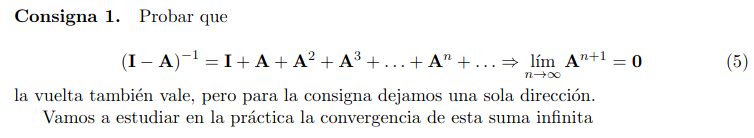

Idea: Si todos los modulos de los autovalores valen menor que 1 entonces la matriz va a tender a 0 elevándola a n+1

### Consigna 2 <font color="green">YA ESTÁ</font>

Calculo las normas de A1 y A2 elevados de 1 a 250

In [3]:
#Defino la matriz A1
A1 = np.array([
    [0.186, 0.521, 0.014, 0.32, 0.134],
    [0.24, 0.073, 0.219, 0.013, 0.327],
    [0.098, 0.12, 0.311, 0.302, 0.208],
    [0.173, 0.03, 0.133, 0.14, 0.074],
    [0.303, 0.256, 0.323, 0.225, 0.257]
])

#Defino la matriz A2

A2 = np.array([
    [0.186, 0.521, 0.014, 0.32, 0.134],
    [0.24, 0.073, 0.219, 0.013, 0.327],
    [0.098, 0.12, 0.311, 0.302, 0.208],
    [0.173, 0.03, 0.133, 0.14, 0.074],
    [0.003, 0.256, 0.323, 0.225, 0.257]
])


In [4]:
I = np.eye(5)
#Defino las listas de normas
a1 = []
a2 = []
Ak1 = I
Ak2 = I
for i in range(250):
    Ak1 = A1 @ Ak1
    a1.append(norm(Ak1, 2))

    Ak2 = A2 @ Ak2
    a2.append(norm(Ak2, 2))



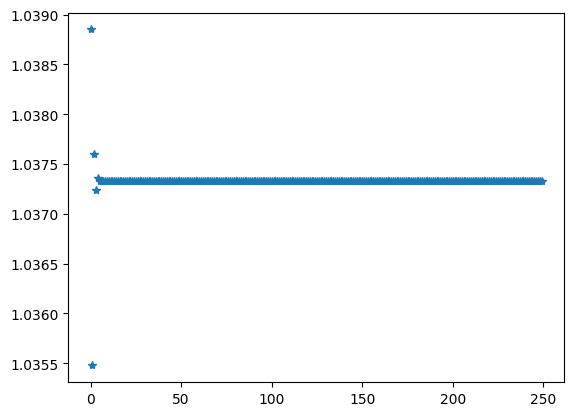

In [18]:
plt.plot(a1,"*")

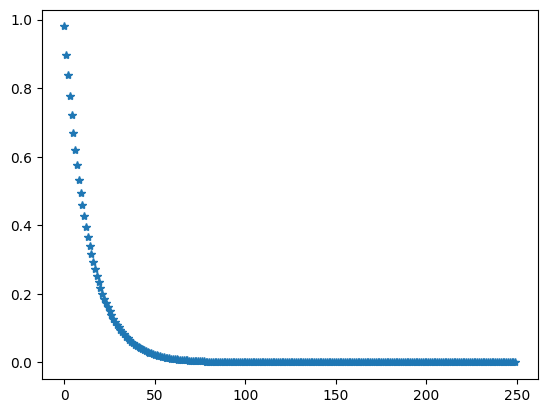

In [19]:
plt.plot(a2,"*")

### Consigna 3 <font color="green">YA ESTÁ</font>



Busco mayores autovalores de las matrices A1 y A2 usando el metodo de la potencia

In [8]:
# Número de iteraciones
k = 250

# Para la matriz A1
avalA1prom, avalA1desv = metodoMonteCarlo(A1,k)

# Para la matriz A2
avalA2prom, avalA2desv = metodoMonteCarlo(A2,k)



Hago una tabla de comparacion de promedio y desvio estandar de vectores de las matrices A1 y A2

In [9]:
t = {"Promedio" : [avalA1prom, avalA2prom], "Desvio estandar" : [avalA1desv, avalA2desv]}
tabla = pd.DataFrame(data = t, index = ["A1", "A2"])
tabla

,Promedio,Desvio estandar
A1,1.0000,0.0
A2,0.9277,0.0


### Consigna 4 <font color="red">REVISAAAAAAAAAAAAAAAAAAAAAAARRRRRRRRRRRRRRRRRR</font>

**A**     Graficamos la serie de potencias de (I-A)<sup>-1</sup>= I + A + A<sup>2</sup> + ... + A<sup>n</sup> para A1 y A2, con n=10 y n=100

In [ ]:
from numpy.linalg import matrix_power
def seriePotencia(A, n):
    normas = []
    suma = np.eye(A.shape[0])
    for i in range(1, n+1):
        suma += matrix_power(A, i)
        normas.append(norm(suma, 2))
    return (suma, normas)

In [ ]:
normas_A1_10 = seriePotencia(A1, 10)[1]
normas_A1_100 = seriePotencia(A1, 100)[1]
normas_A2_10 = seriePotencia(A2, 10)[1]
normas_A2_100 = seriePotencia(A2, 100)[1]

In [ ]:
plt.plot(normas_A1_10, "*")

In [ ]:
plt.plot(normas_A1_100, "*")

In [ ]:
plt.plot(normas_A2_10, "*")

In [ ]:
plt.plot(normas_A2_100, "*")

In [ ]:
I = np.eye(5)

#Defino las listas de normas

a1 = []
a2 = []

Ak1 = I
Ak2 = I

for i in range(250):
    Ak1 = A1 @ Ak1
    a1.append(norm(Ak1, 2))

    Ak2 = A2 @ Ak2
    a2.append(norm(Ak2, 2))
    

**A**     Graficamos la serie de potencias de (I-A)<sup>-1</sup> para A1 y A2, con n=10 y n=100

In [ ]:
#Generamos las matrices

leon1=invertir(np.eye(5)-A1)
leon2=leontiefizar(A2)

#hallo la serie de potencias

leonk1=np.eye(5)
leonk2=np.eye(5)
l1=[]
l2=[]


for i in range(11):
    leonk1 = leon1 @ leonk1
    l1.append(norm(leonk1, 2))

for i in range(101):

    leonk2 = leon2 @ leonk2
    l2.append(norm(leonk2, 2))

print(l1)


[np.float64(3.3794386135941236e+16), np.float64(1.1009598432709496e+33), np.float64(3.5867276050505913e+49), np.float64(1.1684908392854004e+66), np.float64(3.8067313491308205e+82), np.float64(1.240164071232049e+99), np.float64(4.040229747040118e+115), np.float64(1.3162336167867867e+132), np.float64(4.2880505377914166e+148), np.float64(1.3969691383161034e+165), np.float64(4.5510722324946705e+181)]


Graficamos para (I-A<sub>1</sub>)<sup>-1</sup>

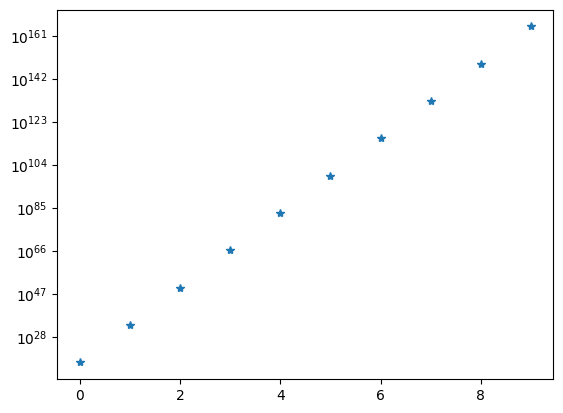

In [34]:
plt.plot(l1[:10],"*")
plt.yscale("log")


Graficamos para (I-A<sub>2</sub>)<sup>-1</sup>

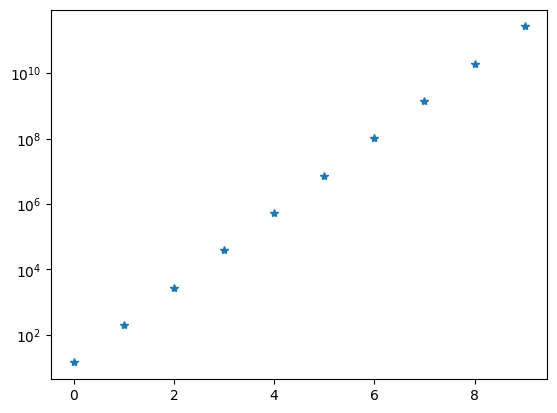

In [37]:
plt.plot(l2[:10],"*")
plt.yscale("log")

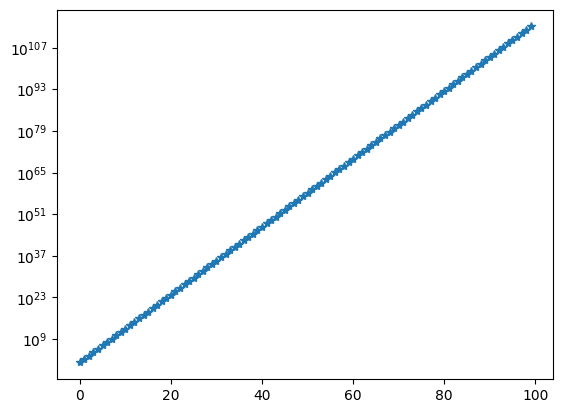

In [38]:
plt.plot(l2[:100],"*")
plt.yscale("log")

### Consigna 5

In [39]:
data = pd.read_excel("matrizlatina2011_compressed_0.xlsx",sheet_name = "LAC_IOT_2011")
data.head()

,Country_iso3,Nosector,Sector,ARGs1,ARGs2,ARGs3,ARGs4,ARGs5,ARGs6,ARGs7,...,EXP_MDV,EXP_NPL,EXP_TUR,EXP_PAK,EXP_LKA,EXP_CUB,EXP_SUR,EXP_ROW,Adjustment,Output
0,ARG,s01,Agriculture and forestry,9725.566485,18.369597,0.000000,0.000000,11890.682268,2331.532300,594.552280,...,0.000000,0.865281,132.020508,2.572569,0.0,30.970039,0.011896,2403.097412,-1695.114624,64585.080680
1,ARG,s02,Hunting and fishing,13.820241,0.062689,0.000000,0.000000,1.253285,2.774203,0.445318,...,0.000000,0.000000,0.161072,0.000000,0.0,0.000000,0.000000,0.815166,5.434752,1430.287291
2,ARG,s03,Mining and quarrying (energy),6.095956,0.140437,2238.394196,47.503210,0.522333,0.618710,0.165520,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1847.147827,23964.065765
3,ARG,s04,Mining and quarrying (non-energy),0.000000,0.687199,295.194361,470.706336,1.140358,13.123509,1.914597,...,0.000000,0.000000,0.000000,0.000000,0.0,0.019760,0.000000,0.432800,355.133514,7486.322979
4,ARG,s05,Meat and meat products; dairy products,23.017536,0.009325,0.505593,0.040398,356.730934,88.047795,15.017792,...,0.035902,0.000000,0.131605,0.547536,0.0,3.120524,0.039276,414.973785,-30.369465,17628.831707


Hacemos el mismo procedimiento que en el TP1 para seleccionar las matrices deseadas

In [ ]:
import funciones as f

In [ ]:
data_ = data.copy()
data_ = data_.dropna(subset = ["Country_iso3"])
data_ = data_.set_index(["Country_iso3", "Nosector"]) #renombramos el indice para que indique de qué pais y qué sector es cada fil
data_ = data_.loc[["ARG", "HND"]] #filtro de filas para paises que nos fueron asignadas
output = data_[["Output"]] #el vector P

#Ahora nos quedamos solamente con la columnas que nos interesan...
data_ = data_[[col for col in data.columns if ("ARG" in col or "HND" in col) and ("CONS" not in col) and ("GFCF" not in col)]]

data_.shape,output.shape

((80, 80), (80, 1))

In [ ]:
output=output.replace(0,1)
output.query('Output == 0')

,,Output
Country_iso3,Nosector,


In [ ]:
Z_AA=data_.to_numpy()[:40,:40]
Z_AH=data_.to_numpy()[:40,40:]
Z_HA=data_.to_numpy()[40:,:40]
Z_HH=data_.to_numpy()[40:,40:]

P_A=np.eye(40)*output.head(40).to_numpy()
P_H=np.eye(40)*output.tail(40).to_numpy()

In [ ]:
A_AA=Z_AA@f.invertir(P_A)
A_AH=Z_AH@f.invertir(P_H)
A_HA=Z_HA@f.invertir(P_A)
A_HH=Z_HH@f.invertir(P_H)


Tomo las matrices A_AA y A_HH como A_ss y A_rr 

In [ ]:
v = np.random.rand(A_AA.shape[0])
aval_A_AA = metodoPotencia(A_AA, v, 250)
aval_A_HH = metodoPotencia(A_HH, v, 250)
print("Autovalor de A_AA : {}".format(aval_A_AA), "Autovalor de A_HH : {}".format(aval_A_HH) )

Autovalor de A_AA : 0.3919441702169346 Autovalor de A_HH : 0.5596953653484473


In [ ]:
max(np.linalg.eig(A_AA)[0])

(0.39194417021693484+0j)

In [ ]:
min(np.linalg.eig(A_AA)[0])

(-0.0378988356308313-0.03145985388710414j)

In [ ]:
max(np.linalg.eig(A_HH)[0])

(0.5596953653484487+0j)

In [ ]:
min(np.linalg.eig(A_HH)[0])

(-0.06326146806709103+0j)

Como el modulo de los maximos autovalores son menores que uno en ambos casos debería converger, también se revisó si los modulos de los autovalores menores valen menos que 1 para asegurarnos de que no haya ningun autovalor que haga que diverja la matriz

# Análisis en componentes principales

### Consigna 6

In [67]:
def En (n):
    return np.eye(n)-(1/n)*np.ones((n,1))@np.ones((1,n))

En(10)

array([[ 0.9, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1],
       [-0.1,  0.9, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1],
       [-0.1, -0.1,  0.9, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1],
       [-0.1, -0.1, -0.1,  0.9, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1],
       [-0.1, -0.1, -0.1, -0.1,  0.9, -0.1, -0.1, -0.1, -0.1, -0.1],
       [-0.1, -0.1, -0.1, -0.1, -0.1,  0.9, -0.1, -0.1, -0.1, -0.1],
       [-0.1, -0.1, -0.1, -0.1, -0.1, -0.1,  0.9, -0.1, -0.1, -0.1],
       [-0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1,  0.9, -0.1, -0.1],
       [-0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1,  0.9, -0.1],
       [-0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1,  0.9]])

##### Probamos que para cualquier vector Z, el promedio de las componentes de En@Z es 0

##### Analizamos En@A para ver qué efecto tiene En sobre A

In [96]:
#A = np.random.rand(5, 5)
A = np.random.randn(5, 5)
A

array([[-0.78593463,  0.88078151, -0.67439833,  0.22698308, -0.83043025],
       [-1.61325565, -0.79245903, -0.02318977, -1.34746789,  0.41703876],
       [-1.64820148, -0.30898284,  1.13439141, -0.35785467,  0.32691415],
       [ 0.83993504, -0.50268636, -1.57395901, -0.90206587,  1.5300506 ],
       [-0.06365205,  0.18599813,  1.64791571, -1.2434229 ,  1.34056465]])

In [97]:
B=En(5)@A
B

array([[-0.13171287,  0.98825123, -0.77655033,  0.95174873, -1.38725783],
       [-0.9590339 , -0.68498931, -0.12534178, -0.62270224, -0.13978882],
       [-0.99397973, -0.20151312,  1.03223941,  0.36691098, -0.22991343],
       [ 1.49415679, -0.39521664, -1.67611101, -0.17730022,  0.97322302],
       [ 0.5905697 ,  0.29346784,  1.54576371, -0.51865725,  0.78373706]])

In [98]:
norm(A), norm(B)

(np.float64(4.983145943960412), np.float64(4.290113998450015))

In [95]:
metodoMonteCarlo(A,10), metodoMonteCarlo(B,10), 

((np.float64(-1.1938), np.float64(0.6392)),
 (np.float64(-1.7246), np.float64(0.0146)))

**(b)**

### Consigna 7

### Consigna 8

# Matriz H

### Consigna 9

### Consigna 10

### Consigna 11

In [ ]:
# Calculamos autovalores exactos para comparar
autovalores1, autovectores1 = np.linalg.eig(A1)

print("Autovalor 1 aproximado:", autovalor1)
print("Autovalores exactos de A1:", autovalores1)
# Guardamos en las variables promedio y desvio estandar
lista_vectores1 = metodoPotencia(A1, v, k)[1]
promedio1 = np.mean(lista_vectores1, axis = 0)
desvio1 = np.std(lista_vectores1, axis = 0)

In [ ]:
# Número de iteraciones
k = 250
v = np.array([1, 2, 3, 4, 5])
#Para la matriz A2
v_normalizado2 = metodoPotencia(A2, v, k)[0]
# Obtenemos el autovalor correspondiente usando el autovector calculado
autovalor2 = np.dot(A1 @ v_normalizado2, v_normalizado2) / np.dot(v_normalizado2, v_normalizado2)

# Calculamos autovalores exactos para comparar
autovalores2, autovectores2 = np.linalg.eig(A2)

print("Autovalor 2 aproximado:", autovalor2)
print("Autovalores exactos de A2:", autovalores2)
# Guardamos en las variables promedio y desvio estandar
lista_vectores2 = metodoPotencia(A2, v, k)[1]
promedio2 = np.mean(lista_vectores2, axis = 0)
desvio2 = np.std(lista_vectores2, axis = 0)